<a href="https://colab.research.google.com/github/cauefeder/Data-Analysis-Notebooks/blob/main/Panorama_do_COVID_19_no_Brasil(Caue_Feder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

*Esse trabalho foi feito baseado nas fontes do site Our World on Data  (ourworldondata.org) onde se encontra o arquivo csv para análise no seguinte link (https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data-codebook.md) .*

*O problema básico em analisar esses dados ocorrem pela falta de contagem, dados sujos e de fontes diferentes que inclusive se distinguem e contradizem entre si, conforme o órgão ou instituição utilizada.*




In [10]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib as mp
import plotly as pl
import matplotlib.pyplot as plt



# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

## Análise Exploratória dos Dados

Primeiramente vamos, vizualizar a tabela com as colunas e primeiros dados, ver o tamanho de linhas e quais são os parâmetros das colunas. Para então procurar a porcentagem de dados ausentes. Formatar corretamente a coluna date para datetime. 




In [11]:
#Primeiras linhas da base de dados em csv
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [12]:
#Dimensãos da base de dados tabular. Entradas e colunas.
df.shape


(304376, 67)

In [13]:
#Títulos de todas as colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
#Tipagens de cada coluna seja como variável/atributo/objeto. 
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [15]:
#verificando dados ausentes
df.isnull().sum() / df.shape[0]

iso_code                                   0.000000
continent                                  0.047487
location                                   0.000000
date                                       0.000000
total_cases                                0.117904
                                             ...   
population                                 0.000000
excess_mortality_cumulative_absolute       0.965730
excess_mortality_cumulative                0.965730
excess_mortality                           0.965730
excess_mortality_cumulative_per_million    0.965730
Length: 67, dtype: float64

In [16]:
#Estruturando os dados de data e verificando o volume dos casos totais
df.date = pd.to_datetime(df.date)
df.loc[df.date == '2020-06-14'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
299725,OWID_WRL,NaN,World,2020-06-14,7790116.0,144407.0,129430.714,482405.0,4938.0,5052.714,...,34.635,60.130,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
115604,OWID_HIC,NaN,High income,2020-06-14,4273065.0,49184.0,41526.286,320538.0,1427.0,1472.000,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
194585,OWID_NAM,NaN,North America,2020-06-14,2446319.0,36787.0,29243.714,155909.0,1564.0,1562.000,...,NaN,NaN,NaN,NaN,NaN,6.003237e+08,NaN,NaN,NaN,NaN
288982,OWID_UMC,NaN,Upper middle income,2020-06-14,2437373.0,60617.0,57110.429,128958.0,2717.0,2819.714,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
84316,OWID_EUR,NaN,Europe,2020-06-14,2131953.0,16000.0,15731.429,198111.0,501.0,565.000,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278154,TKM,Asia,Turkmenistan,2020-06-14,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,100.000,7.400,68.19,0.715,6.430777e+06,NaN,NaN,NaN,NaN
280560,TUV,Oceania,Tuvalu,2020-06-14,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,NaN,NaN,67.57,NaN,1.133500e+04,NaN,NaN,NaN,NaN
292595,VUT,Oceania,Vanuatu,2020-06-14,NaN,0.0,0.000,NaN,0.0,0.000,...,34.500,25.209,NaN,70.47,0.609,3.267440e+05,NaN,NaN,NaN,NaN
297318,OWID_WLS,Europe,Wales,2020-06-14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.170000e+06,NaN,NaN,NaN,NaN


In [35]:
df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[6:14]
#Ranking

,location,total_deaths
286575,United States,116682.0
252900,South America,80959.0
285372,United Kingdom,54453.0
36264,Brazil,41828.0
14604,Asia,39650.0
130016,Italy,34301.0
154083,Lower middle income,30735.0
256511,Spain,29534.0


Verifica-se que o ranking dos 5 países com maiores mortes de covid-19 são:
Estados Unidos,
Reino Unido,
Brasil,
Itália e
Espanha

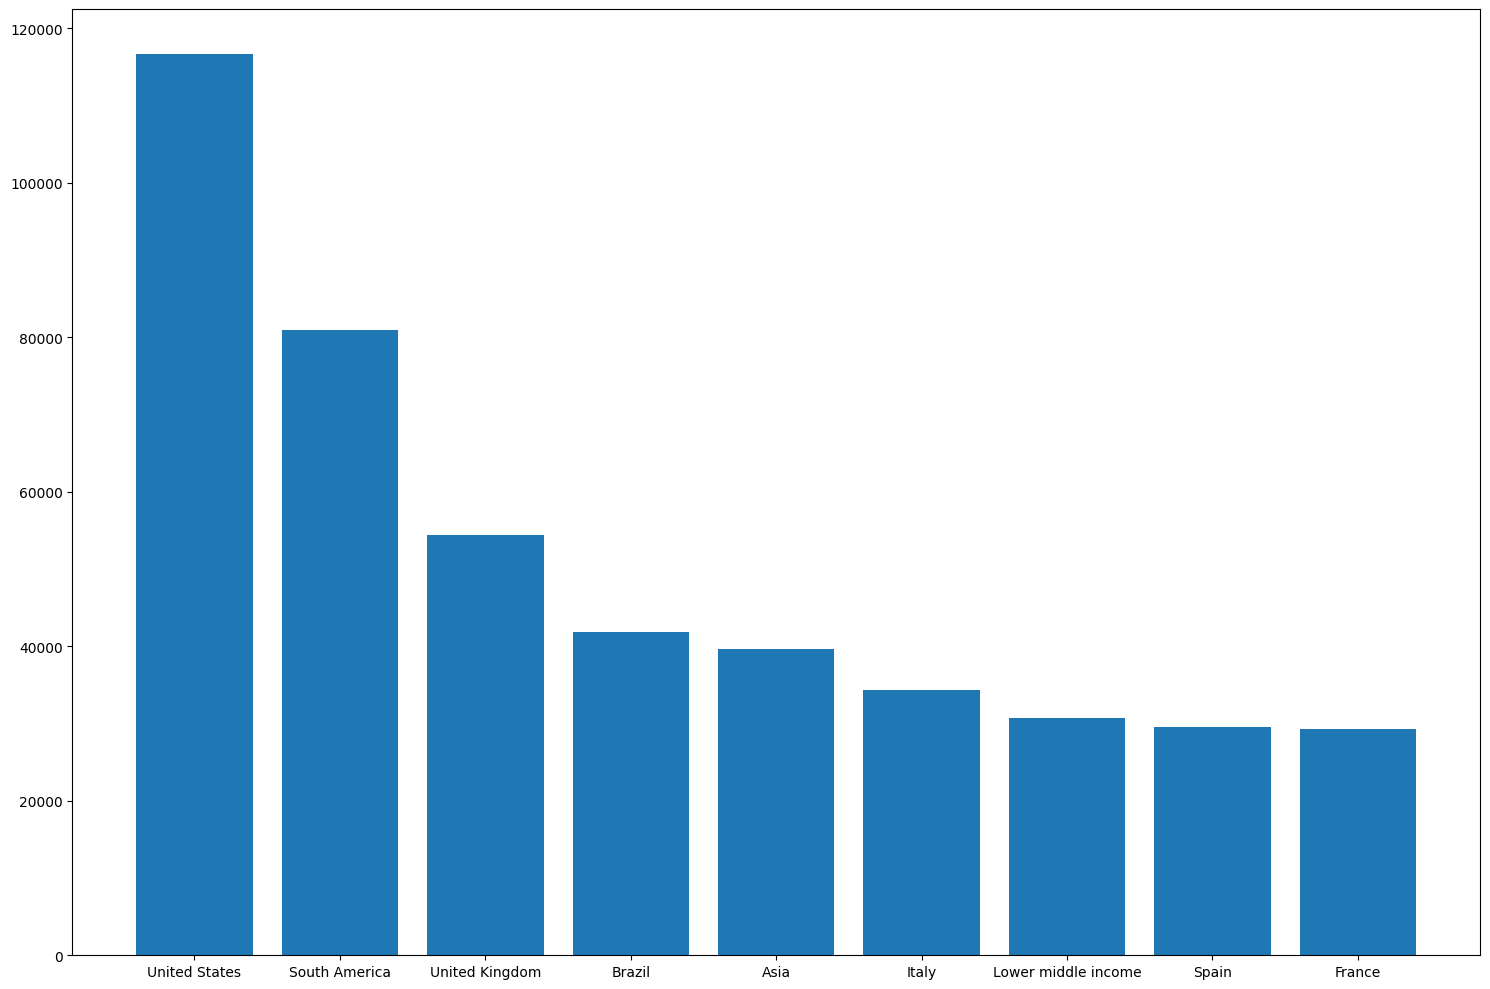

In [18]:
top_5_total_deaths = df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[6:15]

fig, ax = plt.subplots(figsize=(15,10))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

### Como o vírus está progredindo?

Uma das maiores preocupações das organizações de saúde é a progressão do número de casos e mortes no mundo.

Uma das melhores formas de visualizarmos a evolução ao longo do tempo, é o gráfico de linhas. Por isso, vamos plotar um gráfico de linha para demonstrar e evolução de mortes no mundo.

<Axes: >

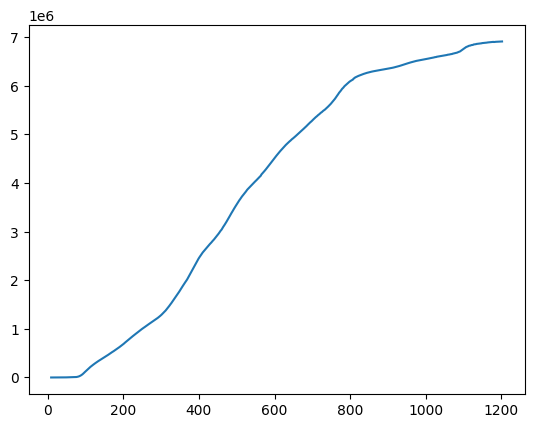

In [19]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()

### Gráfico de dispersão

Verifica-se que quanto maior o PIB per capita, menos mortes. Lembrando que países mais populosos terão mais mortes e confirmando o PIB per capita baixo.

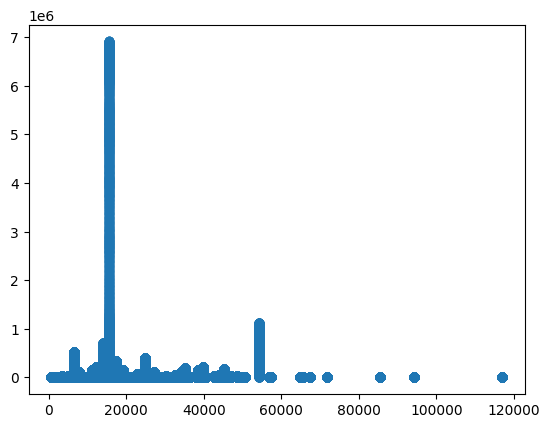

In [20]:
mp.pyplot.scatter(df.gdp_per_capita,df.total_deaths)

### Análise Exploratória para o Brasil

* Criar uma cópia do DataFrame apenas com o Brasil
* Identificar quando foi registrada a primeira morte no Brasil
* Identificar quantos dias demorou para registrarmos a primeira morte, considerando o primeiro caso de COVID-19 registrado.
* Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.

In [21]:
#Cópia do dataframe para o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

In [22]:
#Primeiras linhas do dataset.
df_brasil.head(10)
              

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
36101,BRA,South America,Brazil,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36102,BRA,South America,Brazil,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36103,BRA,South America,Brazil,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36104,BRA,South America,Brazil,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36105,BRA,South America,Brazil,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36106,BRA,South America,Brazil,2020-01-08,NaN,0.0,0.0,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36107,BRA,South America,Brazil,2020-01-09,NaN,0.0,0.0,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36108,BRA,South America,Brazil,2020-01-10,NaN,0.0,0.0,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36109,BRA,South America,Brazil,2020-01-11,NaN,0.0,0.0,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36110,BRA,South America,Brazil,2020-01-12,NaN,0.0,0.0,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [23]:
#Pesquisa da data da primeira morte no Brasil
df_brasil.query("`total_deaths` == 1")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
36177,BRA,South America,Brazil,2020-03-19,291.0,57.0,36.714,1.0,1.0,0.143,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [24]:
#Pesquisa do primeiro caso de covid-19 no Brasil.
df_brasil.query("`total_cases` == 1")

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
36156,BRA,South America,Brazil,2020-02-27,1.0,1.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36157,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN
36158,BRA,South America,Brazil,2020-02-29,1.0,0.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,2427.8,1.14,3.12,11.387628
36159,BRA,South America,Brazil,2020-03-01,1.0,0.0,0.143,NaN,0.0,0.0,...,17.9,NaN,2.2,75.88,0.765,215313504.0,NaN,NaN,NaN,NaN


In [39]:
import datetime


diferenca = datetime.date(day=19, month=3, year=2020)-datetime.date(day=27, month=2, year=2020)

print("O tempo de dias entre o primeiro caso de covid-19 e a primeira morte no Brasil foi de", diferenca.days, "dias.")


O tempo de dias entre o primeiro caso de covid-19 e a primeira morte no Brasil foi de 21 dias


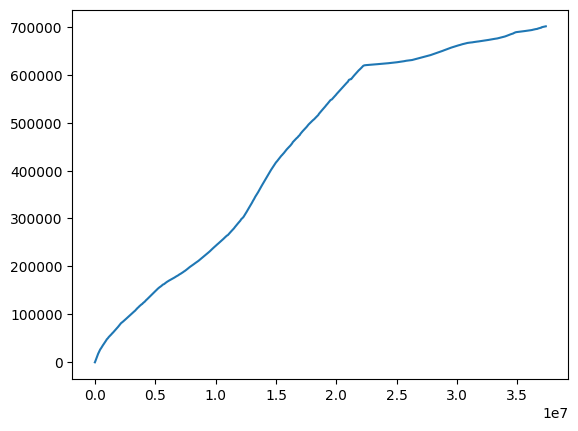

In [26]:
mp.pyplot.plot(df_brasil.total_cases,df_brasil.total_deaths)

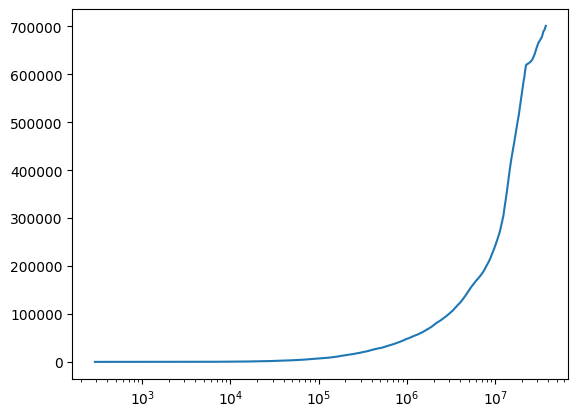

In [27]:
mp.pyplot.semilogx(df_brasil.total_cases,df_brasil.total_deaths)

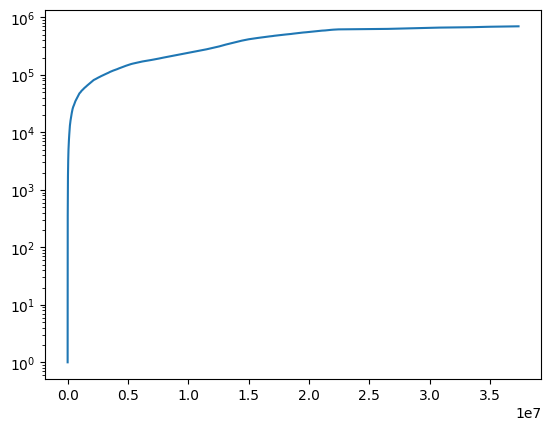

In [28]:
mp.pyplot.semilogy(df_brasil.total_cases,df_brasil.total_deaths)

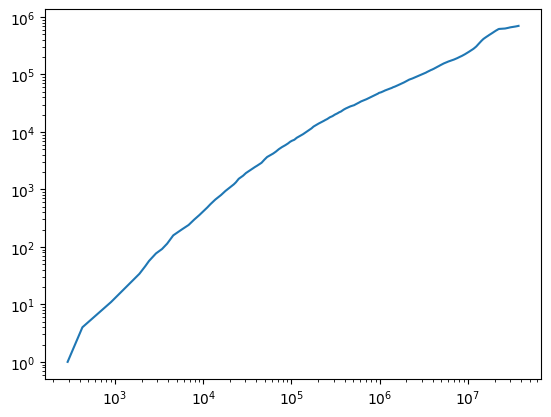

In [29]:
mp.pyplot.loglog(df_brasil.total_cases,df_brasil.total_deaths)

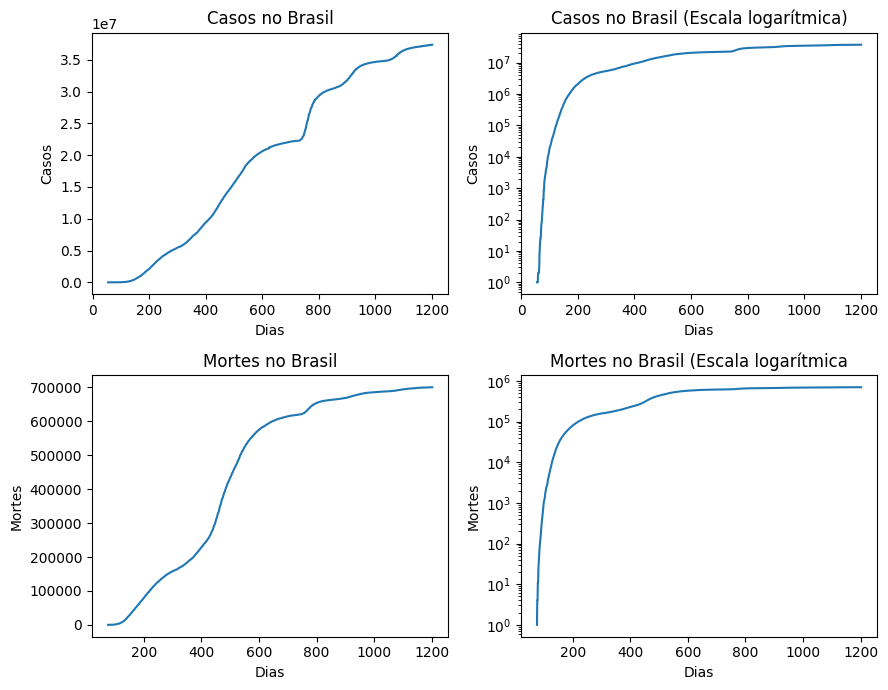

In [30]:
# Plotar gráficos de linha em escalas linear e logarítmica para os casos totais e mortes totais.
x = list(range(1203))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()

## Conclusão

Verifica-se que os dados ficam desatualizados rapidamente nessa análise.

Os Estados Unidos tiveram muito mais casos e mortes do que o Brasil, e a curva não se achatará tão cedo, inclusive mostra-se uma tendência de maior alta ainda nos Estados Unidos.

Percebe-se que é uma pandemia de fato e com muitas vítimas, teremos que viver com isso daqui pra frente, essas análises nos ajudam com insights para possíveis próximas doenças altamente transmissíveis.

